In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np


from feature_detection import computeHarrisValues, detectCorners, computeMOPSDescriptors, produceMatches
from plot_matches import drawPercent

In [2]:
def pickle_cv2(arr):
    index = []
    for point in arr:
        temp = (point[0], point[1], point[2], point[3])
        index.append(temp)
    return np.array(index)

def unpickle_cv2(arr):
    index = []
    for point in arr:
        temp = (point[0], point[1], point[2], point[3])
        index.append(temp)
    return np.array(index)

loaded = np.load('resources/arrays.npz', allow_pickle=True)
d = unpickle_cv2(loaded['d_proc'])

In [3]:
np.arange(35330)[d[:, 3] > 0]

array([ 8018,  9252,  9423,  9424, 10251, 10413, 10414, 10737, 11367,
       11368, 11513, 11946, 11947, 11948, 12093, 12238, 12525, 12526,
       12959, 13108, 13253, 13807, 13815, 14083, 14222, 14361, 14374,
       14501, 15204, 15325, 15326, 15347, 15744, 15894, 16016, 16677,
       16679, 17023, 17134, 17245, 17246, 17357, 17470, 17583, 17700,
       17825, 17950, 18078, 18465, 18594, 18740])

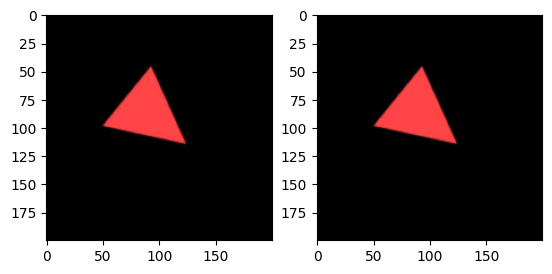

In [4]:
# visualize original images
img1 = cv2.imread('resources/triangle1.jpg', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('resources/triangle1.jpg', cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


f, axarr = plt.subplots(1, 2)
axarr[0].imshow(img1)
axarr[1].imshow(img2)

In [5]:
# compute Harris corner detection and MOPS for img1
img1_norm = img1.astype(np.float32)/255.
grayImage1 = cv2.cvtColor(img1_norm, cv2.COLOR_BGR2GRAY)
grayImage1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(200, 200), dtype=float32)

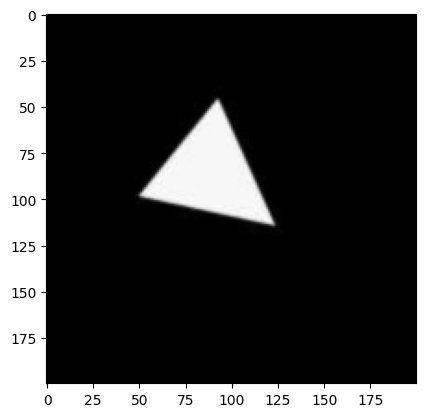

In [6]:
from scipy import ndimage
sbl_x = ndimage.sobel(grayImage1, 1, mode='nearest')
plt.imshow(sbl_x, cmap='gray')
gauss = ndimage.gaussian_filter(grayImage1, sigma=0.5, radius=2, mode='nearest')
plt.imshow(gauss, cmap='gray')

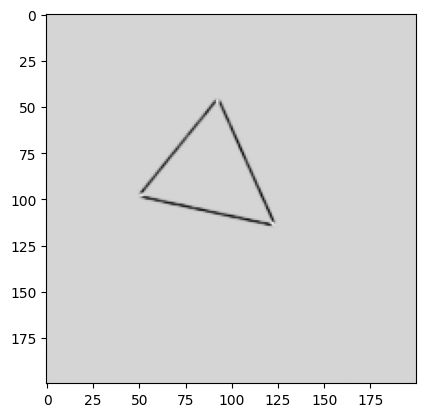

In [7]:
(harrisImg1, orientationImg1) = computeHarrisValues(grayImage1)
plt.imshow(harrisImg1, cmap='gray')

In [8]:

(harrisImg1, orientationImg1) = computeHarrisValues(grayImage1)
corners1 = detectCorners(harrisImg1,orientationImg1)


#compute Harris corner detection and MOPS for img2
img2_norm = img2.astype(np.float32) / 255.
grayImage2 = cv2.cvtColor(img2_norm, cv2.COLOR_BGR2GRAY)
(harrisImg2, orientationImg2) = computeHarrisValues(grayImage2)
corners2 = detectCorners(harrisImg2,orientationImg2)

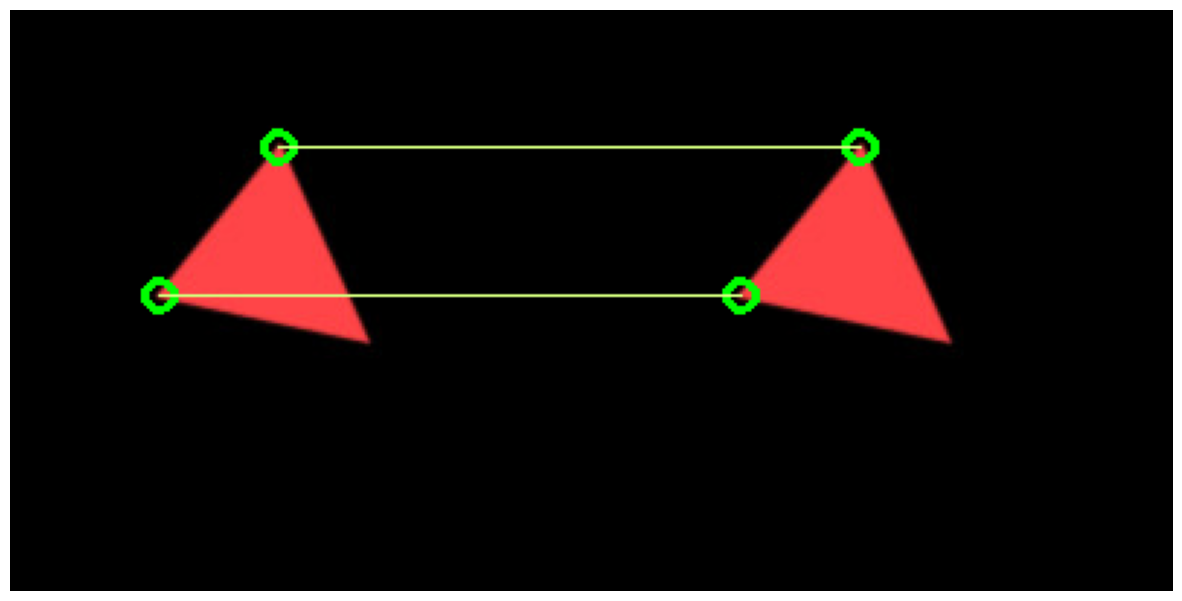

In [9]:
# 79.9% matched and the threshold is 10^(-2).
vis = drawPercent(79.9, img1, img2, -2, corners1, corners2)
plt.figure(figsize=(15, 20))
plt.axis('off')
plt.imshow(vis)

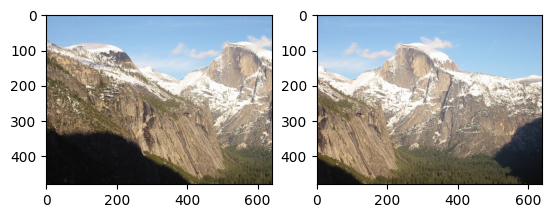

In [10]:
# visualize original images
img1 = cv2.imread('resources/yosemite/yosemite1.jpg', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('resources/yosemite/yosemite2.jpg', cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(img1)
axarr[1].imshow(img2)

In [11]:
# compute Harris corner detection and MOPS for img1
img1_norm = img1.astype(np.float32)
img1_norm /= 255.
grayImage1 = cv2.cvtColor(img1_norm, cv2.COLOR_BGR2GRAY)
(harrisImg1, orientationImg1) = computeHarrisValues(grayImage1)
corners1 = detectCorners(harrisImg1,orientationImg1)


#compute Harris corner detection and MOPS for img2
img2_norm = img2.astype(np.float32)
img2_norm /= 255.
grayImage2 = cv2.cvtColor(img2_norm, cv2.COLOR_BGR2GRAY)
(harrisImg2, orientationImg2) = computeHarrisValues(grayImage2)
corners2 = detectCorners(harrisImg2,orientationImg2)

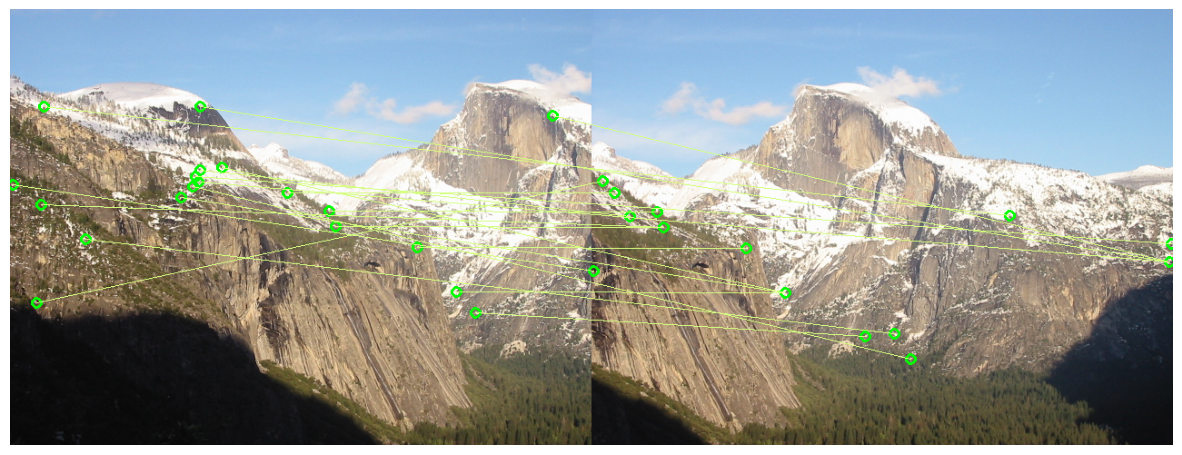

In [12]:
# 9.9% matched and the threshold is 10^(-.8). 
vis = drawPercent(9.9, img1, img2, -.8, corners1, corners2)
plt.figure(figsize=(15, 20))
plt.axis('off')
plt.imshow(vis)

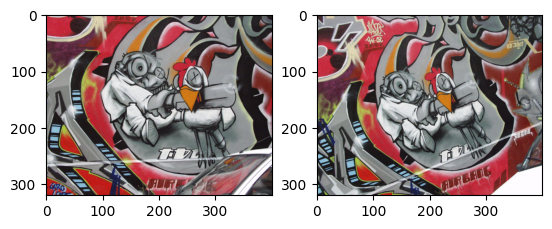

In [13]:
# visualize original images
img1 = cv2.imread('resources/graf/img1.png', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('resources/graf/img2.png', cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(img1)
axarr[1].imshow(img2)

In [14]:
# compute Harris corner detection and MOPS for img1
img1_norm = img1.astype(np.float32)
img1_norm /= 255.
grayImage1 = cv2.cvtColor(img1_norm, cv2.COLOR_BGR2GRAY)
(harrisImg1, orientationImg1) = computeHarrisValues(grayImage1)
corners1 = detectCorners(harrisImg1,orientationImg1)


#compute Harris corner detection and MOPS for img2
img2_norm = img2.astype(np.float32)
img2_norm /= 255.
grayImage2 = cv2.cvtColor(img2_norm, cv2.COLOR_BGR2GRAY)
(harrisImg2, orientationImg2) = computeHarrisValues(grayImage2)
corners2 = detectCorners(harrisImg2,orientationImg2)

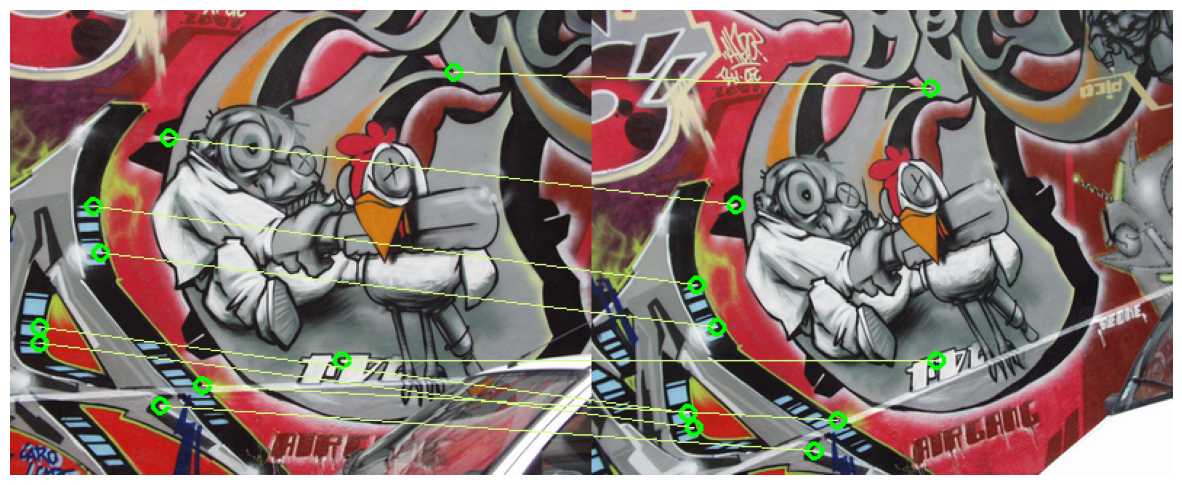

In [15]:
# 5.6% matched and the threshold is 10^(-.8). 
vis = drawPercent(5.6, img1, img2, -.8, corners1, corners2)
plt.figure(figsize=(15, 20))
plt.axis('off')
plt.imshow(vis)

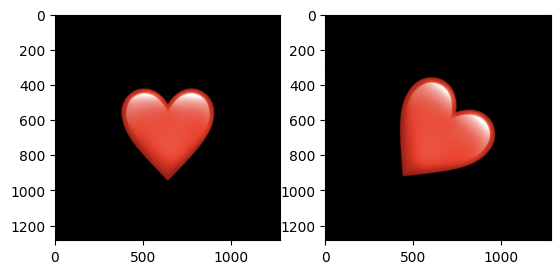

In [16]:
# visualize original images
img1 = cv2.imread('resources/heart1.jpg', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('resources/heart2.jpg', cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(img1)
axarr[1].imshow(img2)

In [17]:
# compute Harris corner detection and MOPS for img1
img1_norm = img1.astype(np.float32)
img1_norm /= 255.
grayImage1 = cv2.cvtColor(img1_norm, cv2.COLOR_BGR2GRAY)
(harrisImg1, orientationImg1) = computeHarrisValues(grayImage1)
corners1 = detectCorners(harrisImg1,orientationImg1)


#compute Harris corner detection and MOPS for img2
img2_norm = img2.astype(np.float32)
img2_norm /= 255.
grayImage2 = cv2.cvtColor(img2_norm, cv2.COLOR_BGR2GRAY)
(harrisImg2, orientationImg2) = computeHarrisValues(grayImage2)
corners2 = detectCorners(harrisImg2,orientationImg2)

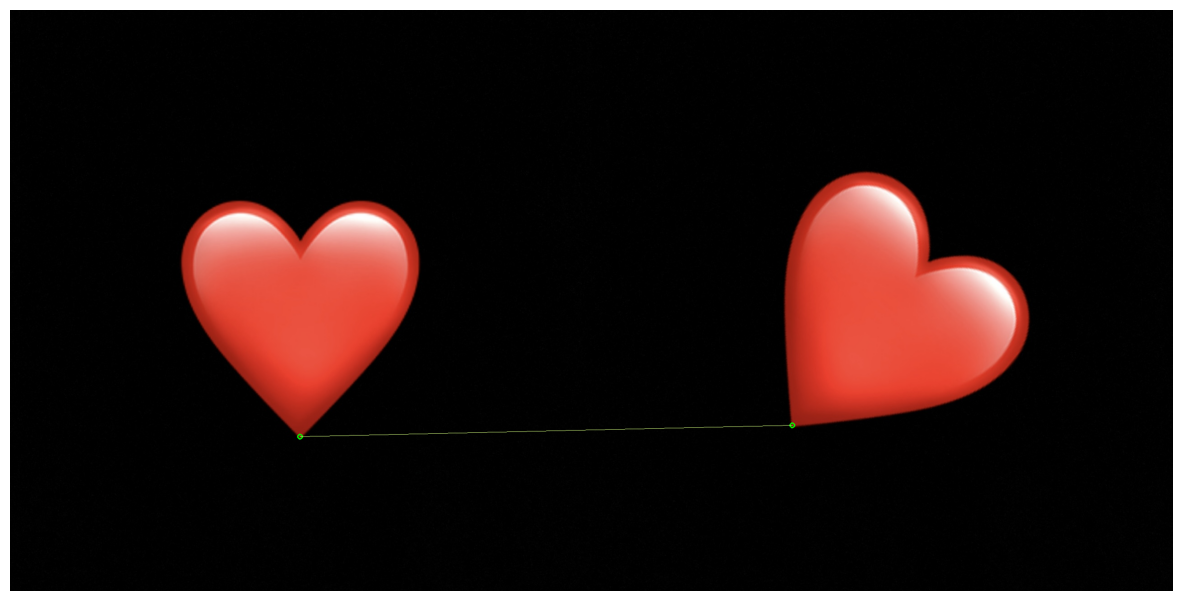

In [18]:
# 2.6% matched and the threshold is 10^(-5).
vis = drawPercent(2.6, img1, img2, -5, corners1, corners2)
plt.figure(figsize=(15, 20))
plt.axis('off')
plt.imshow(vis)